### Load Packages

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import nibabel as nib
from nibabel.viewers import OrthoSlicer3D
import skimage.transform as skTrans
import pandas as pd
from matplotlib.ticker import FuncFormatter

### Snapshot

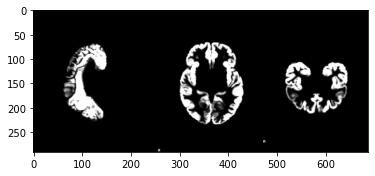

In [2]:
img = cv2.imread('data/CMU_50642/CMU_50642-ants/ants/anat_thickness.png')
plt.imshow(img)
plt.show()

### NIFTI (Neuroimaging Informatics Technology Initiative)

In [3]:
img = nib.load('data/CMU_50642/CMU_50642-ants/ants/anat_thickness.nii.gz')

In [4]:
img.shape

(216, 256, 291)

In [5]:
img = nib.load('data/CMU_50643/CMU_50643-ants/ants/anat_thickness.nii.gz')

In [6]:
img.shape

(216, 256, 291)

In [7]:
img = nib.load('data/Caltech_51460/Caltech_51460-ants/ants/anat_thickness.nii.gz')

In [8]:
img.shape

(216, 256, 291)

##### 3D Display

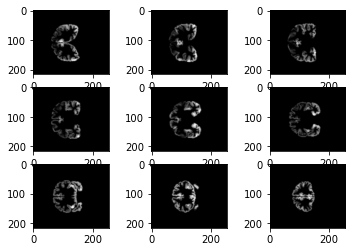

In [9]:
from nibabel.viewers import OrthoSlicer3D
example_filename = 'data/CMU_50642/CMU_50642-ants/ants/anat_thickness.nii.gz'
img = nib.load(example_filename)
width, height, queue = img.dataobj.shape
num=1
for i in range(110,200,10):
    img_arr=img.dataobj[:,:,i]
    plt.subplot(3,3,num)
    plt.imshow(img_arr,cmap='gray')
    num+=1
plt.show()
# a set of sequence diagrams

### access the numpy array

In [10]:
example_filename = 'data/CMU_50642/CMU_50642-ants/ants/anat_thickness.nii.gz'
arr = nib.load(example_filename).get_fdata()
print(arr)
print(arr.shape)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
(216, 256,

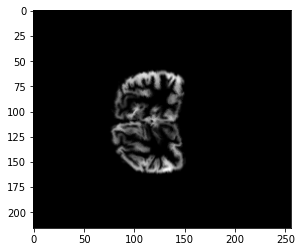

In [11]:
def read_data(path):
    image_data = nib.load(path).get_fdata()
    return image_data

def show_img(ori_img):
    plt.imshow(ori_img[:,:,85], cmap = 'gray') #channel_last
    plt.show()

path = 'data/CMU_50642/CMU_50642-ants/ants/anat_thickness.nii.gz'

data = read_data(path)

show_img(data)

In [12]:
import cv2
path = 'data/CMU_50642/CMU_50642-ants/ants/anat_thickness.nii.gz'

### ABIDE Summary Spreadsheet

In [13]:
df = pd.read_csv('Phenotypic.csv')

In [14]:
df.shape

(1112, 106)

In [15]:
df.head()

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
0,0,1,50002,1,50002,PITT,no_filename,1,1,16.77,...,NaN,OK,NaN,fail,ic-parietal-cerebellum,OK,NaN,fail,ERROR #24,1
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,...,NaN,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1


**label**

In [16]:
df['DX_GROUP'].value_counts()
# 1: Autism
# 2: Control

2    573
1    539
Name: DX_GROUP, dtype: int64

In [17]:
df1 = pd.DataFrame()
df1['ID'] = df[['SITE_ID', 'subject']].astype(str).agg('_'.join, axis=1)

In [18]:
df1['label'] = df['DX_GROUP']

In [19]:
df1.set_index('ID',inplace=True)

In [20]:
df1

,label
ID,
PITT_50002,1
PITT_50003,1
PITT_50004,1
PITT_50005,1
PITT_50006,1
...,...
SBL_51583,1
SBL_51584,1
SBL_51585,1


### list of all the subdirectories

In [21]:
d='data'
folders = list(filter(lambda x: os.path.isdir(os.path.join(d, x)), os.listdir(d)))

In [22]:
len(folders)

1112

In [23]:
folders.remove('UCLA_51232')
folders.remove('UCLA_51233')
folders.remove('UCLA_51242')
folders.remove('UCLA_51243')
folders.remove('UCLA_51244')
folders.remove('UCLA_51245')
folders.remove('UCLA_51246')
folders.remove('UCLA_51247')
folders.remove('UCLA_51270')
folders.remove('UCLA_51310')

In [24]:
len(folders)

1102

In [25]:
folders = folders[:200]

In [27]:
a = []
for i in folders:
    path = 'data/'+i+'/'+i+'-ants'+'/ants/anat_thickness.nii.gz'
    #print(path)
    img = nib.load(path).get_fdata()
    result1 = skTrans.resize(img, (140,120,180), order=1, preserve_range=True)
    result = result1.flatten()
    #result = img.flatten()
    a.append(result)

In [28]:
result = []
for row in a:
    row = list(row)
    del row[:3000000]
    del row[-2000000:]
    result.append(row)

In [29]:
data = pd.DataFrame(a,index=folders)

In [30]:
data.shape

(200, 3024000)

In [31]:
# instead of cropping image, filter the features that are zero for all rows
df = data.loc[:, data.any()]

In [32]:
df.head()

,571223,571224,571225,571402,571403,571404,571405,571582,571583,571584,...,2517558,2517559,2517560,2517561,2517562,2517563,2517564,2517736,2517737,2517738
Caltech_51456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Caltech_51457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Caltech_51458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Caltech_51459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Caltech_51460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
folders = list(map(str.upper,folders))

In [34]:
label = df1.reindex(index = folders)

In [35]:
label

,label
ID,
CALTECH_51456,1
CALTECH_51457,1
CALTECH_51458,1
CALTECH_51459,1
CALTECH_51460,1
...,...
MAXMUN_51329,1
MAXMUN_51330,1
MAXMUN_51331,1


In [36]:
label.loc[label.label==2, 'label'] = 0

In [37]:
label.label.value_counts()

0    102
1     98
Name: label, dtype: int64

### PCA

In [38]:
# min-max normalization
df = df.apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=1)

In [39]:
df.head()

,571223,571224,571225,571402,571403,571404,571405,571582,571583,571584,...,2517558,2517559,2517560,2517561,2517562,2517563,2517564,2517736,2517737,2517738
Caltech_51456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Caltech_51457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Caltech_51458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Caltech_51459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Caltech_51460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=200)

In [42]:
principalComponents = pca.fit_transform(df)

In [43]:
principalComponents.shape

(200, 200)

### Model 1: LDA

In [44]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [45]:
y = np.array(label['label'])

In [46]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0], dtype=int64)

In [47]:
X = principalComponents

In [48]:
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=200, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.586 (0.092)


#### shuffle the label

In [49]:
y_shuffle = np.random.permutation(y)

In [50]:
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=2000, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y_shuffle, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.472 (0.093)


### Model 2: Nearest neighbor

In [51]:
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,25)
score_list = []
std_list = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors = k)
    cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=200, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    score_list.append(mean(scores))
    std_list.append(std(scores))

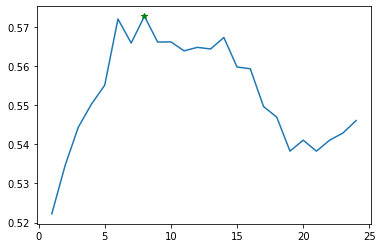

In [52]:
import matplotlib.pyplot as plt
plt.plot(k_range,score_list)
plt.plot(k_range[7], score_list[7], 'g*')

In [53]:
print(score_list[7],std_list[7])

0.572725 0.07823729529450772


### Model 3: Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=200, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.565 (0.083)


### Model 4: Support Vector Classification

In [55]:
from sklearn import svm

In [56]:
model = svm.SVC(kernel='rbf', C=8)
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=200, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.602 (0.091)


#### shuffle the label

In [57]:
y_shuffle = np.random.permutation(y)
model = svm.SVC(kernel='rbf', C=8)
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=2000, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y_shuffle, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.487 (0.092)


### Model 5: Random Forest

The main parameters to adjust when using these methods is `n_estimators` and `max_features`. 

`n_estimators` is the number of trees in the forest. The larger the better, but also the longer it will take to compute. 

`max_features` is the size of the random subsets of features to consider when splitting a node

In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=100,min_samples_split=2, random_state=0)
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=200, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.544 (0.097)


### Result

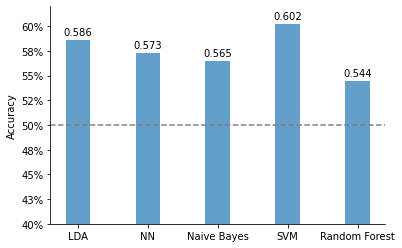

In [67]:
fig, ax = plt.subplots()
model = ['LDA', 'NN', 'Naive Bayes','SVM','Random Forest']
accuracy = [0.586,0.573,0.565, 0.602, 0.544]
rects1 = ax.bar(model,accuracy,width=0.35, alpha=0.7)
plt.ylim(0.4, 0.62)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
plt.ylabel('Accuracy')
plt.axhline(y=0.5, color='grey', linestyle='--')
ax.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [68]:
fig.savefig('result.png', transparent=True)

### Next Step

**Neural Network**

**Image Harmonization**\
   how to define bias and fairness in medical image analysis\
   
   Site differences essentially consist of two types of biases: engineering bias (i.e.,
   measurement bias) and biological bias (i.e., sampling bias). 
   
**Measurement bias** includes differences in the properties of MRI scanners such as imaging  parameters, field strength, MRI manufacturers, and scanner models

**Sampling bias** refers to differences in participant groups among sites. For example, differences in the clinical characteristics of patients examined at different sites

   